In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler,Normalizer,OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import roc_curve,auc
import itertools
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('preprocessed_data.csv')
data.columns

Index(['payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_city', 'customer_state', 'price',
       'freight_value', 'product_name_length', 'product_description_length',
       'product_photos_qty', 'seller_state', 'product_category_name',
       'delivery_days', 'estimated_days', 'ships_in', 'arrival_time',
       'delivery_impression', 'estimated_del_impression', 'ship_impression',
       'seller_popularity', 'existing_cust', 'Score'],
      dtype='object')

In [3]:
data.shape

(103030, 23)

In [100]:
X = data.drop('Score',axis=1)
Y = data.Score.values

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.33,stratify=Y,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(69030, 22) (34000, 22) (69030,) (34000,)


# Normalising all the numerical features

In [101]:
std_scaler = Normalizer()
min_max = MinMaxScaler()

#payment_sequential feature
payment_sequential_train = std_scaler.fit_transform(X_train.payment_sequential.values.reshape(-1,1))
payment_sequential_test = std_scaler.transform(X_test.payment_sequential.values.reshape(-1,1))

#payment_installments feature
payment_installments_train = std_scaler.fit_transform(X_train.payment_installments.values.reshape(-1,1))
payment_installments_test = std_scaler.transform(X_test.payment_installments.values.reshape(-1,1))

#Payment value feature
payment_value_train = std_scaler.fit_transform(X_train.payment_value.values.reshape(-1,1))
payment_value_test = std_scaler.transform(X_test.payment_value.values.reshape(-1,1))


#price
price_train = std_scaler.fit_transform(X_train.price.values.reshape(-1,1))
price_test = std_scaler.transform(X_test.price.values.reshape(-1,1))

#freight_value
freight_value_train = std_scaler.fit_transform(X_train.freight_value.values.reshape(-1,1))
freight_value_test = std_scaler.transform(X_test.freight_value.values.reshape(-1,1))

#product_name_length
product_name_length_train = std_scaler.fit_transform(X_train.product_name_length.values.reshape(-1,1))
product_name_length_test = std_scaler.transform(X_test.product_name_length.values.reshape(-1,1))


#product_description_length
product_description_length_train = std_scaler.fit_transform(X_train.product_description_length.values.reshape(-1,1))
product_description_length_test = std_scaler.transform(X_test.product_description_length.values.reshape(-1,1))


#product_photos_qty
product_photos_qty_train = std_scaler.fit_transform(X_train.product_photos_qty.values.reshape(-1,1))
product_photos_qty_test = std_scaler.transform(X_test.product_photos_qty.values.reshape(-1,1))


#delivery_days
delivery_days_train = std_scaler.fit_transform(X_train.delivery_days.values.reshape(-1,1))
delivery_days_test = std_scaler.transform(X_test.delivery_days.values.reshape(-1,1))


#estimated_days
estimated_days_train = std_scaler.fit_transform(X_train.estimated_days.values.reshape(-1,1))
estimated_days_test = std_scaler.transform(X_test.estimated_days.values.reshape(-1,1))


#ships_in
ships_in_train = std_scaler.fit_transform(X_train.ships_in.values.reshape(-1,1))
ships_in_test = std_scaler.transform(X_test.ships_in.values.reshape(-1,1))

#seller_popularity
seller_popularity_train = min_max.fit_transform(X_train.seller_popularity.values.reshape(-1,1))
seller_popularity_test = min_max.transform(X_test.seller_popularity.values.reshape(-1,1))

# Normalising Categorical features

In [102]:
#initialising oneHotEncoder

onehot = CountVectorizer()
cat = OneHotEncoder()
#payment_type
payment_type_train = onehot.fit_transform(X_train.payment_type.values)
payment_type_test = onehot.transform(X_test.payment_type.values)


#customer_state
customer_state_train = onehot.fit_transform(X_train.customer_state.values)
customer_state_test = onehot.transform(X_test.customer_state.values)

#seller_state
seller_state_train = onehot.fit_transform(X_train.seller_state.values)
seller_state_test = onehot.transform(X_test.seller_state.values)


#product_category_name
product_category_name_train = onehot.fit_transform(X_train.product_category_name.values)
product_category_name_test = onehot.transform(X_test.product_category_name.values)


#arrival_time
arrival_time_train = onehot.fit_transform(X_train.arrival_time.values)
arrival_time_test = onehot.transform(X_test.arrival_time.values)

#delivery_impression
delivery_impression_train = onehot.fit_transform(X_train.delivery_impression.values)
delivery_impression_test = onehot.transform(X_test.delivery_impression.values)


#estimated_del_impression
estimated_del_impression_train = onehot.fit_transform(X_train.estimated_del_impression.values)
estimated_del_impression_test = onehot.transform(X_test.estimated_del_impression.values)

#ship_impression
ship_impression_train = onehot.fit_transform(X_train.ship_impression.values)
ship_impression_test = onehot.transform(X_test.ship_impression.values)


#existing_cust
existing_cust_train = cat.fit_transform(X_train.existing_cust.values.reshape(-1,1))
existing_cust_test = cat.transform(X_test.existing_cust.values.reshape(-1,1))

**Stacking the data**

In [103]:
#stacking up all the encoded features
X_train_vec = hstack((payment_sequential_train,payment_installments_train,payment_value_train,price_train,
                      freight_value_train,product_name_length_train,product_description_length_train,
                      product_photos_qty_train,delivery_days_train,estimated_days_train,ships_in_train,
                      payment_type_train,customer_state_train,seller_state_train,product_category_name_train,
                      arrival_time_train,delivery_impression_train,estimated_del_impression_train,
                     ship_impression_train,seller_popularity_train))

X_test_vec = hstack((payment_sequential_test,payment_installments_test,payment_value_test,price_test,
                      freight_value_test,product_name_length_test,product_description_length_test,
                      product_photos_qty_test,delivery_days_test,estimated_days_test,ships_in_test,
                      payment_type_test,customer_state_test,seller_state_test,product_category_name_test,
                      arrival_time_test,delivery_impression_test,estimated_del_impression_test,
                     ship_impression_test,seller_popularity_test))

print(X_train_vec.shape,X_test_vec.shape)

(69030, 153) (34000, 153)


In [26]:
import scipy
scipy.sparse.save_npz('X_train_vec.npz', X_train_vec)
scipy.sparse.save_npz('X_test_vec.npz', X_test_vec)

In [ ]:
pd.DataFrame(y_train).to_csv('train_labels.csv',index=False)
pd.DataFrame(y_test).to_csv('test_labels.csv',index=False)

In [18]:
tomato = scipy.sparse.load_npz('X_train_vec.npz')
tomato.shape

(69030, 153)

numpy.float64

# Naive Bayes

# Hyper parameter Tuning

In [30]:
naive = MultinomialNB(class_prior=[0.5,0.5])

param = {'alpha': [0.0001,0.001,0.01,0.1,1,10,100,1000]}

#for the bow based model
NB = GridSearchCV(naive,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
NB.fit(X_train_vec,y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(class_prior=[0.5, 0.5]),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             refit=False, return_train_score=True, scoring='roc_auc')

In [31]:
NB.best_params_

{'alpha': 0.1}

# Fitting the Model

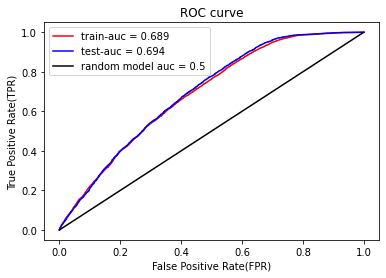

Best AUC for the model is 0.694 


In [32]:
clf = MultinomialNB(alpha=0.0001,class_prior=[0.5,0.5])
clf.fit(X_train_vec,y_train)

#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

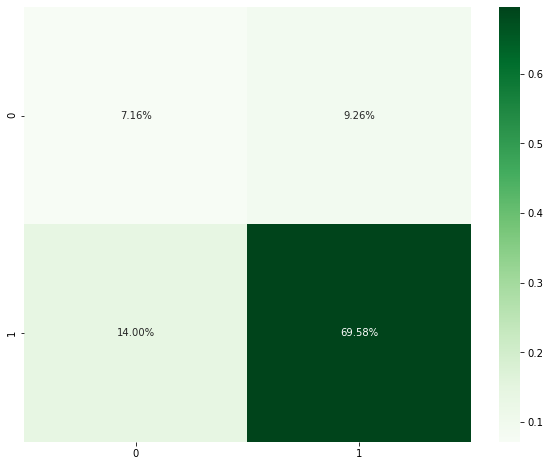

In [33]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_train/np.sum(cf_matrix_train), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [34]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.8568
Test F1_score for this model is :  0.8575


In [35]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.7674
Test Accuracy score for this model :  0.7689


# Observations

1. Naive bayes performed pretty decent in terms of minimal overfitting in train and test performances.
2. Both train and test f1 score was 0.86 and accuracy 77%.
3. But the confusion matrix says it has misclassified many points as False Positives.
4. AUC score for test data was 0.694.

# Logistic Regression

# Hyper parameter Tuning

In [36]:
#we have used max_iter 1000 as it was causing exception while fitting
Logi = LogisticRegression(max_iter=1000,solver='lbfgs')

param = {'C': [0.0001,0.001,0.01,0.1,1,10,20,30]}

#for the bow based model
LR = GridSearchCV(Logi,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
LR.fit(X_train_vec,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30]},
             refit=False, return_train_score=True, scoring='roc_auc')

In [37]:
LR.best_params_

{'C': 0.1}

**NOTE**

* For performance measurement we will not use accuracy as a metric as the data set is highly imbalanced.
* We will use AUC score and f1 score as performance metric.

In [38]:
#model
clf = LogisticRegression(C=0.1,max_iter=1000,solver='lbfgs')
clf.fit(X_train_vec,y_train)

LogisticRegression(C=0.1, max_iter=1000)

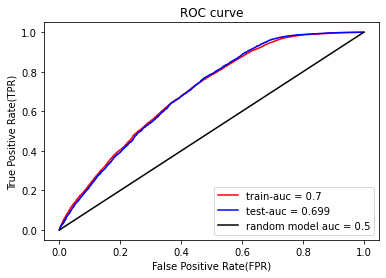

Best AUC for the model is 0.699 


In [39]:
#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

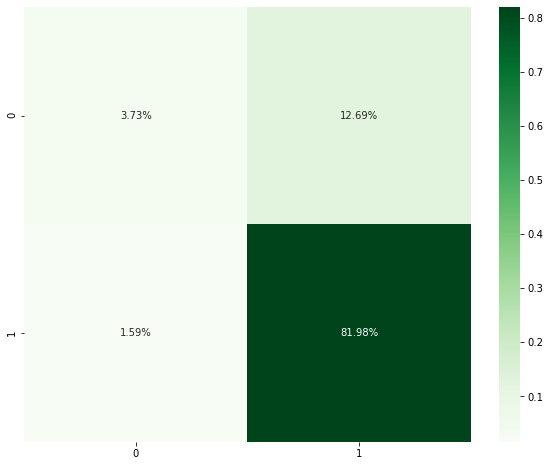

In [40]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_train/np.sum(cf_matrix_train), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [41]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.9199
Test F1_score for this model is :  0.9217


In [42]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.8572
Test Accuracy score for this model :  0.8605


# Observations

1. Logistic regression performs considerably better than Naive bayes in terms of f1 score, however AUC score being almost the same.
2. Misclassification of False positives reduced which resulted in the increase of f1 score of 92%.
3. Accuracy was 86% for both train and test which shows the model doesn't overfit at all.

# Decision Tree

# HyperParmater tuning

In [43]:
#model initialize
DT = DecisionTreeClassifier(class_weight='balanced')

#hyper parameters
param = {'max_depth':  [1, 5,10,15,20], 'min_samples_split': [5, 10, 100, 300,500,1000]}

#Grid search CV
DT = GridSearchCV(DT,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
DT.fit(X_train_vec,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'min_samples_split': [5, 10, 100, 300, 500, 1000]},
             refit=False, return_train_score=True, scoring='roc_auc')

In [44]:
#best params
DT.best_params_

{'max_depth': 20, 'min_samples_split': 300}

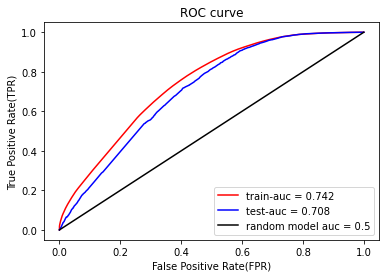

Best AUC for the model is 0.708 


In [73]:
#model
clf = DecisionTreeClassifier(class_weight='balanced',max_depth=20,min_samples_split=300)
clf.fit(X_train_vec,y_train)


#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

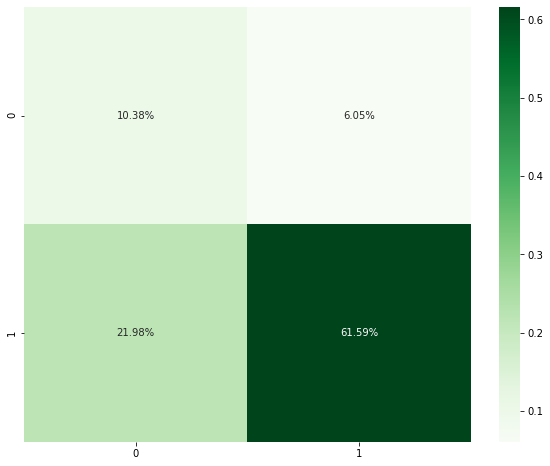

In [46]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_train/np.sum(cf_matrix_train), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [47]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.8146
Test F1_score for this model is :  0.8031


In [48]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.7197
Test Accuracy score for this model :  0.7021


# Observations

1. Decision Tree does nothing better interms of both f1 score , auc score and accuracy comes out to be 0.708 and 70%.
2. It misclassfied False Positives to a lot.
3. Model doesn't overfit but doesn't perform better either.

# Random Forest

# Hyperparameter Tuning

In [49]:
#param grid
#we have limit max_depth to 10 so that the model doesn't overfit
param = { 'min_samples_split':[5,10,30,50,100],'max_depth':[5,7,10]}

#Random forest classifier
RFclf = RandomForestClassifier(class_weight='balanced')

#using grid search cv to tune parameters
RF = GridSearchCV(RFclf,param,cv=5,refit=False,n_jobs=-1,verbose=1,return_train_score=True,scoring='roc_auc')
RF.fit(X_train_vec,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.5min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10],
                         'min_samples_split': [5, 10, 30, 50, 100]},
             refit=False, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [50]:
RF.best_params_

{'max_depth': 10, 'min_samples_split': 5}

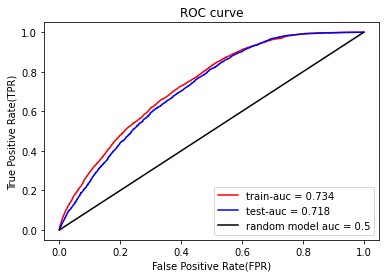

Best AUC for the model is 0.718 


In [51]:
#model
clf = RandomForestClassifier(class_weight='balanced',max_depth=10,min_samples_split=5)
clf.fit(X_train_vec,y_train)


#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

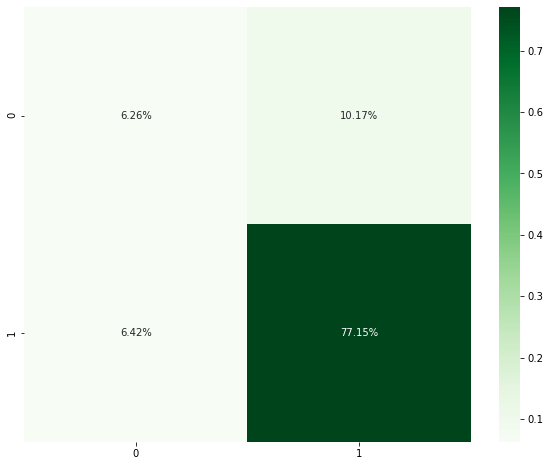

In [52]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_train/np.sum(cf_matrix_train), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [53]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.9029
Test F1_score for this model is :  0.9013


In [54]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.8341
Test Accuracy score for this model :  0.8315


# Observations

1. Random forest performs better than logistic regression in terms of f1 score and accuracy.
2. It gives an f1 score of 90.13% and doesn't seem to overfit.
3. Misclassification rate is still not that great.
4. AUC is score is 0.718
5. Accuracy score is 83%.

# GBDT

# Hyper parameter tuning

In [66]:
#param grid
#we have limit max_depth to 8 so that the model doesn't overfit
param = { 'min_samples_split' : [5,10,30,50],'max_depth' : [3,5,7,8]}

GBDTclf = GradientBoostingClassifier()

clf = GridSearchCV(RFclf,param,cv=5,refit=False,return_train_score=True,scoring='roc_auc')
clf.fit(X_train_vec,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [3, 5, 7, 8],
                         'min_samples_split': [5, 10, 30, 50]},
             refit=False, return_train_score=True, scoring='roc_auc')

In [67]:
#best parameters
clf.best_params_

{'max_depth': 8, 'min_samples_split': 10}

In [104]:
import pickle

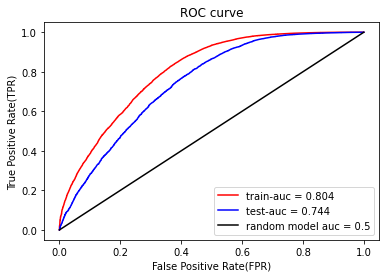

Best AUC for the model is 0.744 


In [108]:
#Model
clf = GradientBoostingClassifier(max_depth=8,min_samples_split=5)
clf.fit(X_train_vec,y_train)

# save the model to disk
Pkl_Filename = "final_model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

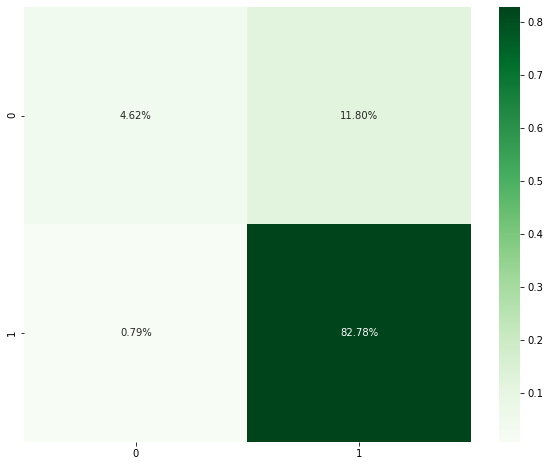

In [69]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_train/np.sum(cf_matrix_train), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [70]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.9293
Test F1_score for this model is :  0.9243


In [71]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.8741
Test Accuracy score for this model :  0.8651


# Observations

1. Gradient Boosted classifier results the best f1 score of 0.9243 and auc score of 0.745.
2. Misclassification of False Positives and True negetives is also reduced to 11% also true positive rate is 83%.
3. Accuracy score is 86% for test and 87% for train data.
4. Model does overfit a slight comapred to rest of the models.

# Standard Neural Network based model


In [15]:
#setting input length to number of features
input_length = X_train_vec.shape[1]

In [19]:
##imports
import os
import sys
import os
import random as rn
import numpy as np
import pandas as pd
import datetime
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score
from keras.utils import np_utils
from tensorflow.keras.regularizers import l2
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import Dense, Input, GlobalMaxPool1D,Conv1D, MaxPool1D, Embedding,concatenate,Flatten,Dropout,LSTM,Concatenate,LeakyReLU
from tensorflow.keras.models import Model

In [81]:
##create an NN and train
os.environ['PYTHONHASHSEED'] = '0'
## Set the random seed values to regenerate the model.
tf.keras.backend.clear_session()
np.random.seed(0)
rn.seed(0)

#input layer
input_layer = Input(shape=(input_length,1))

#Conv layer
Conv1 = Conv1D(filters=10,kernel_size=3,strides=1,padding='valid',activation='relu',kernel_initializer='he_normal',name='Conv1')(input_layer)

#Conv layer
Conv2 = Conv1D(filters=10,kernel_size=3,strides=1,padding='valid',activation='relu',kernel_initializer='he_normal',name='Conv2')(Conv1)

#Conv layer
Conv3 = Conv1D(filters=10,kernel_size=3,strides=1,padding='valid',activation='relu',kernel_initializer='he_normal',name='Conv3')(Conv2)


#MaxPool Layer
pool1 = MaxPool1D(5)(Conv3)

#Flatten Layer
flatten_1 = Flatten()(pool1)

#Batch Normalisation to ensure the training is fast
BM = BatchNormalization()(flatten_1)

#FC layer
FC1 = Dense(units=64,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(0.001),name='FC1')(BM)

#dropout
drop1 = Dropout(rate = 0.5)(FC1)

#Batch Noramlisation
BM2 = BatchNormalization()(drop1)

#FC layer
FC3 = Dense(units=32,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(0.001),name='FC3')(BM2)
# FC3= LeakyReLU(alpha = 0.3)(FC3)

#output layer
Out = Dense(units=2,activation='softmax',name='Output')(FC3)

model = Model(inputs=input_layer,outputs=Out)


model.summary()
# tf.keras.utils.plot_model(model, "model_3.png", show_shapes=True)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 153, 1)]          0         
_________________________________________________________________
Conv1 (Conv1D)               (None, 151, 10)           40        
_________________________________________________________________
Conv2 (Conv1D)               (None, 149, 10)           310       
_________________________________________________________________
Conv3 (Conv1D)               (None, 147, 10)           310       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 29, 10)            0         
_________________________________________________________________
flatten (Flatten)            (None, 290)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 290)               1160  

In [29]:
X_train_vec = np.expand_dims(X_train_vec.toarray(),2)
X_test_vec = np.expand_dims(X_test_vec.toarray(),2)

In [71]:
y_train = tf.keras.utils.to_categorical(y_train)

In [72]:
y_test = tf.keras.utils.to_categorical(y_test)

In [37]:
#auc roc score can be undefined if no data from one class is present in the batch
#so handling such case with custom auc_roc function which returns [0.5,0.5] if there are no points for one class
from sklearn.metrics import roc_auc_score
def auroc(y_true, y_pred):
    return tf.numpy_function(roc_auc_score, (y_true, y_pred), tf.double)

In [38]:
#callbacks
from tensorflow.keras.callbacks import *

#TensorBoard Callback
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

reduce_lr_1 = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=1, min_lr=0.002,verbose = 1)
tensorboard_callback = TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

In [82]:
#compiling and fitting the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=[auroc])
model.fit(X_train_vec,y_train,batch_size=512,workers=16,epochs=20,callbacks=[tensorboard_callback,reduce_lr_1],validation_data=(X_test_vec,y_test))

Epoch 1/20
135/135 [==============================] - 6s 46ms/step - loss: 0.6640 - auroc: 0.5949 - val_loss: 0.5875 - val_auroc: 0.5805 - lr: 0.0010
Epoch 2/20
135/135 [==============================] - 6s 41ms/step - loss: 0.5534 - auroc: 0.6435 - val_loss: 0.5400 - val_auroc: 0.6444 - lr: 0.0010
Epoch 3/20
135/135 [==============================] - 6s 42ms/step - loss: 0.5213 - auroc: 0.6500 - val_loss: 0.4987 - val_auroc: 0.6719 - lr: 0.0010
Epoch 4/20
135/135 [==============================] - 6s 42ms/step - loss: 0.4945 - auroc: 0.6601 - val_loss: 0.4753 - val_auroc: 0.6826 - lr: 0.0010
Epoch 5/20
135/135 [==============================] - 6s 41ms/step - loss: 0.4748 - auroc: 0.6673 - val_loss: 0.4565 - val_auroc: 0.6890 - lr: 0.0010
Epoch 6/20
135/135 [==============================] - 6s 41ms/step - loss: 0.4574 - auroc: 0.6768 - val_loss: 0.4451 - val_auroc: 0.6943 - lr: 0.0010
Epoch 7/20
135/135 [==============================] - 6s 41ms/step - loss: 0.4463 - auroc: 0.6763 - 

In [84]:
pred_label_train = model.predict(X_train_vec)
pred_label_train = [1 if x[1] > x[0] else 0 for x in pred_label_train]
pred_label_test = model.predict(X_test_vec)
pred_label_test = [1 if x[1] > x[0] else 0 for x in pred_label_test]

In [85]:
#Please run train_test split cell to represent y_train and y_test in 1D vector instead of onehot encoded vector.
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.9221
Test F1_score for this model is :  0.9233


In [86]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.8607
Test Accuracy score for this model :  0.8629


# Observations

1. We created a standard deep Neural network model and trained it for 20 epochs this resulted f1 score very similar to our best ML model yet which is GBDT.
2. Kindly note that this neural network was very little hyper-parameter tuning done,and still results in a very decent performance.
3. However the auc score of GBDT is still better than the NN model.
4. Important thing to note that NN based models can be much better than conventional ML models for such problems.

# Results

In [91]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Model", "F1_score", " AUC_score "," Accuracy "]

table.add_row([ "Naive Bayes",'0.8575','0.694','0.7689'])
table.add_row(["Logistic Regression",'0.9217','0.699','0.8605'])
table.add_row(["Decision Tree",'0.8031','0.713','0.7021'])
table.add_row(["Random Forest",'0.9013','0.718','0.8315',])
table.add_row(["GBDT**(BEST)",'0.9243','0.745','0.8651'])
table.add_row(["Deep NN",'0.9233','0.710','0.8629'])

print(table)

+---------------------+----------+-------------+------------+
|        Model        | F1_score |  AUC_score  |  Accuracy  |
+---------------------+----------+-------------+------------+
|     Naive Bayes     |  0.8575  |    0.694    |   0.7689   |
| Logistic Regression |  0.9217  |    0.699    |   0.8605   |
|    Decision Tree    |  0.8031  |    0.713    |   0.7021   |
|    Random Forest    |  0.9013  |    0.718    |   0.8315   |
|     GBDT**(BEST)    |  0.9243  |    0.745    |   0.8651   |
|       Deep NN       |  0.9233  |    0.710    |   0.8629   |
+---------------------+----------+-------------+------------+


# Summary

1. GBDT performs better in comparision to rest of the model in terms of all the performance metric.
2. Logistic regression performs fairly similar to GBDT, but GBDT is more robust to outliers.
3. Rating prediction is not fairly dependent directly on most of the features, so the performance is not at its peak.
4. We have used f1 score as our primary performance metric.
5. We have taken care of overfitting in each model.
6. Each model performed better after we removed neutral review score from the data.